In [281]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (14, 10)

import matplotlib.font_manager as fm 
fm.get_fontconfig_fonts()
font_location = 'NanumBarunGothicBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family='NanumBarunGothicBold')


### 데이터 불러오기

In [282]:
DATA_DIR = "data\고소차 Data"
filename = "\\20191101_20200318 tele_car_req.xlsx"
fpath = DATA_DIR + filename
df = pd.read_excel(fpath)
# df.drop(df["Unnamed: 0"])

In [283]:
df.drop(['arng_cnfm_emp_no', 'arng_cnfm_emp_name', 'aply_date', 'ogan_name_kor-2','ogan_name_kor-3', 'ogan_name_kor-4', 
         'actl_dept_desc', 'rgsr_dept_desc', 'up_user', 'in_user', 'rgsr_user_id', 'rgsr_user_name', 'actl_use_emp_no', 
         'actl_use_emp_name', 'work_grp_code', 'work_grp_desc', 'in_dt', 'up_dt', 'req_st_time', 'req_fin_time'], 
        axis=1, inplace = True)

df = pd.DataFrame(df, columns = ['eqp_id', 'req_no', 'proj_no', 'blk_no', 'use_date', 'req_st_date', 'req_fin_date', 
                                 'eqp_spec_code', 'eqp_req_qty', 'detl_work_desc', 'ogan_name_kor', 'arng_emp_no', 
                                 'arng_emp_name', 'work_zone_code', 'work_zone_desc', 'eqp_kind_code', 'eqp_kind_desc'])
df

,eqp_id,req_no,proj_no,blk_no,use_date,req_st_date,req_fin_date,eqp_spec_code,eqp_req_qty,detl_work_desc,ogan_name_kor,arng_emp_no,arng_emp_name,work_zone_code,work_zone_desc,eqp_kind_code,eqp_kind_desc
0,N-182,20191021020,2479,80B,20191024,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
1,N-182,20191021020,2479,80B,20191025,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
2,N-182,20191021020,2479,80B,20191026,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
3,N-182,20191021020,2479,80B,20191027,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
4,N-182,20191021020,2479,80B,20191028,20191024,20191122,45M,6,NaN,탑재1탑재2파트,421553,주용제,3,1도크 P.E 1공장,N,고소차
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54085,S-112,20200131012,4321,NaN,20200227,20200201,20200302,12M,2,발판 설치 및 해체,덕산기업(주)-덕산상선1반,383525,주효권,11,2도크 P.E 1공장,S,리프트카
54086,S-112,20200131012,4321,NaN,20200228,20200201,20200302,12M,2,발판 설치 및 해체,덕산기업(주)-덕산상선1반,383525,주효권,11,2도크 P.E 1공장,S,리프트카
54087,S-112,20200131012,4321,NaN,20200229,20200201,20200302,12M,2,발판 설치 및 해체,덕산기업(주)-덕산상선1반,383525,주효권,11,2도크 P.E 1공장,S,리프트카
54088,S-112,20200131012,4321,NaN,20200301,20200201,20200302,12M,2,발판 설치 및 해체,덕산기업(주)-덕산상선1반,383525,주효권,11,2도크 P.E 1공장,S,리프트카


In [284]:
df['proj_no'] = df['proj_no'].astype('str')

df['eqp_spec_code'] = df['eqp_spec_code'].astype('str')

df['work_zone_code'] = df['work_zone_code'].astype('str')
# df['work_grp_code'] = df['work_grp_code'].astype('str')

df['req_fin_date'] = df['req_fin_date'].astype('str')
df['req_st_date'] = df['req_st_date'].astype('str')
df['use_date'] = df['use_date'].astype('str')

df = df.sort_values(['use_date', 'req_no', 'eqp_id'])

### 사용시작일, 사용종료일, 시작일 차이 계산

In [285]:
sample_df = df[['eqp_id', 'req_no', 'proj_no', 'use_date', 'req_st_date', 'req_fin_date', 'eqp_spec_code', 'eqp_req_qty', 
                'ogan_name_kor', 'work_zone_code', 'work_zone_desc', 'eqp_kind_code']].copy()
sample_df['req_st_date'] = pd.to_datetime(sample_df['req_st_date'])
sample_df['req_fin_date'] = pd.to_datetime(sample_df['req_fin_date'])
sample_df['use_date'] = pd.to_datetime(sample_df['use_date'])

sample_df = sample_df.groupby(['proj_no', 'req_no', 'eqp_id']).first().reset_index()


sample_df['days_of_req'] = sample_df['req_fin_date'] - sample_df['req_st_date']
sample_df['days_before_work'] = sample_df['use_date'] - sample_df['req_st_date']
sample_df['days_after_work'] = sample_df['req_fin_date'] - sample_df['use_date']


sample_df['days_of_req'] = sample_df['days_of_req'].dt.days
sample_df['days_before_work'] = sample_df['days_before_work'].dt.days
sample_df['days_after_work'] = sample_df['days_after_work'].dt.days


sample_df


,proj_no,req_no,eqp_id,use_date,req_st_date,req_fin_date,eqp_spec_code,eqp_req_qty,ogan_name_kor,work_zone_code,work_zone_desc,eqp_kind_code,days_of_req,days_before_work,days_after_work
0,-,20191031022,N-609,2019-11-01,2019-11-01,2019-11-01,38M,1,금호테크니칼-WASH G청소반,42,G1안벽,N,0,0,0
1,-,20191108020,N-298,2019-11-09,2019-11-09,2019-11-10,28M,1,금호테크니칼주식회사,52,LNGC물류센터,N,1,0,1
2,-,20191121009,N-308,2019-11-23,2019-11-23,2019-11-24,28M,1,금호테크니칼주식회사,52,LNGC물류센터,N,1,0,1
3,-,20191121009,N-340,2019-11-23,2019-11-23,2019-11-24,28M,1,금호테크니칼주식회사,52,LNGC물류센터,N,1,0,1
4,-,20191128032,N-298,2019-11-30,2019-11-30,2019-12-01,26M,2,금호테크니칼주식회사,52,LNGC물류센터,N,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,PAS,20191230017,N-447,2019-12-31,2019-12-31,2019-12-31,15M,1,전기지원반,113,중조립공장(PAS),N,0,0,0
4054,PMS,20200103017,N-389,2020-01-04,2020-01-04,2020-01-04,22M,1,전기지원반,90,배관제작1공장,N,0,0,0
4055,POS2,20191230031,N-313,2020-01-01,2020-01-01,2020-01-02,38M,1,전기지원반,100,선행의장2공장(POS#2),N,1,0,1
4056,POS2,20191230032,N-389,2020-01-01,2020-01-01,2020-01-02,28M,1,전기지원반,100,선행의장2공장(POS#2),N,1,0,1


### 1) 사용시작일 ~ 실제 사용일 까지 걸리는 시간 (일자)
######    사용시작일에 바로 일을 시작한 경우는 제외 (days_before_work : > 0)

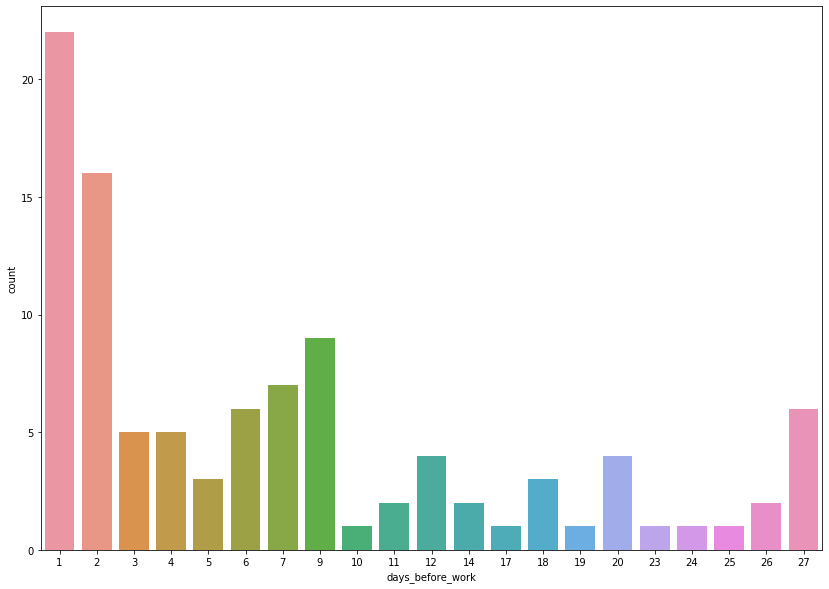

In [292]:
ax = sns.countplot(x='days_before_work', data=sample_df[sample_df['days_before_work'] > 0])
# plt.rc('font', family='NanumBarunGothicBold')
# # ax.set_xlabel('사용시작일 ~ 사용일')
# ax.set_xlabel('Days before work')
# ax.set_ylabel('Count')

### 2) 사용일 부터 사용종료일 까지의 시간 (일자)

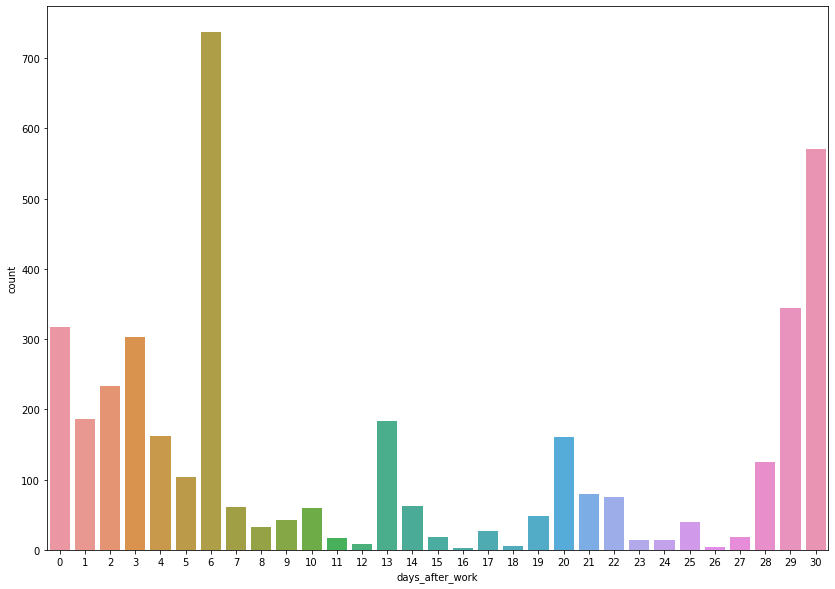

In [291]:
sns.countplot(x='days_after_work', data=sample_df)

### 3) 사용시작일 부터 사용종료일 까지의 시간 (일자)

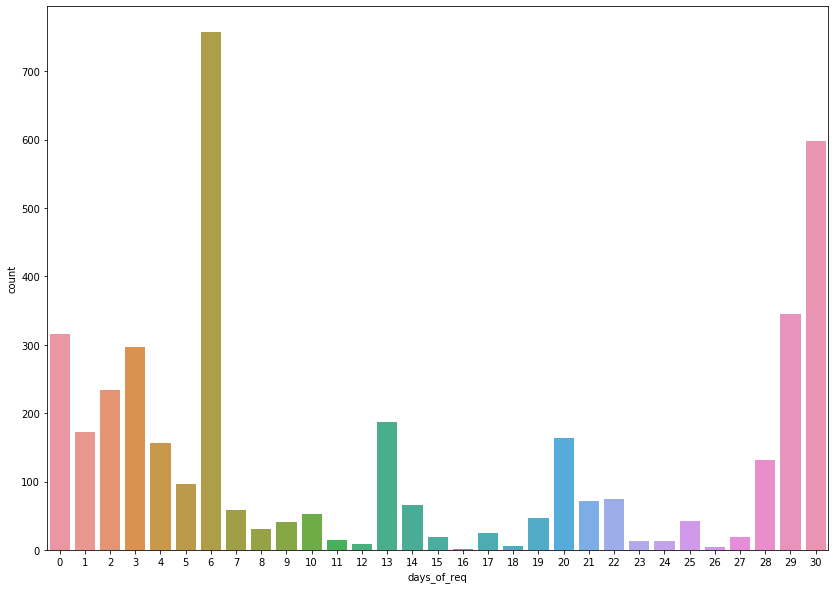

In [293]:
sns.countplot(x='days_of_req', data=sample_df)

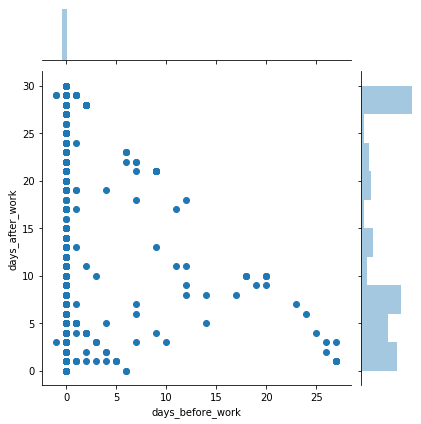

In [294]:
sns.jointplot(x="days_before_work", y="days_after_work", data=sample_df)

프로젝트 코드별 날짜 카운트

고소차 요청 스펙(eqp_spec_code)별 날짜 카운트

- 시작요청일로부터 실제 일을 시작하기까지 걸린 시간

- 실제로 일을 시작한 날부터 일을 종료하기까지 걸린 시간

- 고소차 ID 별

- Project_no 별

- 월별

3) 시작요청일부터 종료요청일 사이에 실제로 일한 날